## Multigrid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

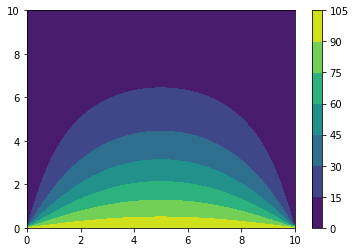

In [21]:
L = 10

n = 0
nmax = 10000

nc = 6

nl = 2**nc + 1

x = np.linspace(0, L, nl)
y = np.linspace(0, L, nl)

v = np.zeros([nl, nl])

v[0, :] = 100

while n <= nmax:

    v[1:nl-1, 1:nl-1] = 0.25*(v[0:nl-2, 1:nl-1] + v[2:nl, 1:nl-1] + v[1:nl-1, 2:nl] + v[1:nl-1, 0:nl-2])
        
    n += 1
    
    v[0, :] = 100
        
plt.contourf(x, y, v)
plt.colorbar()

plt.show()

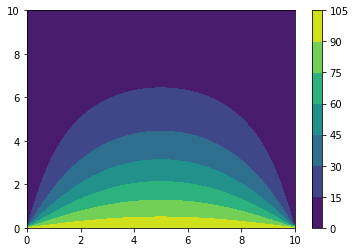

In [33]:
L = 10

nc = 0
ncmax = 6

nl = 2**nc + 1

n = 0
nmax = 10000

v0 = np.zeros([nl, nl])
v0[0, :] = 100

v = v0

while nc < ncmax:
    
    v1 = v
        
    nc = nc + 1
    
    nl = 2**nc + 1
    
    v = np.zeros([nl, nl])
    
    for i in range(nl):
        
        for j in range(nl):
            
            if i%2 == 0 and j%2 == 0:
                
                v[i, j] = v1[int(i/2), int(j/2)]
    
    v[0, :] = 100
    
    n = 0
    
    v1 = v
    
    while n < nmax:
        
        v1[1:nl-1, 1:nl-1] = 0.25*(v[0:nl-2, 1:nl-1] + v[2:nl, 1:nl-1] + v[1:nl-1, 2:nl] + v[1:nl-1, 0:nl-2])
        
        n += 1
        
        v = v1
        
x = np.linspace(0, L, nl)
y = np.linspace(0, L, nl)
    
plt.contourf(x, y, v)
plt.colorbar()

plt.show()

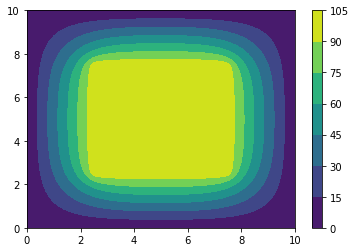

In [31]:
L = 10

n = 0
nmax = 10000

nl = 101

x = np.linspace(0, L, nl)
y = np.linspace(0, L, nl)

v = np.zeros([nl, nl])

v[int(nl/4):int(3*nl/4), int(nl/4)] = 100
v[int(nl/4):int(3*nl/4), int(3*nl/4)] = 100
v[int(nl/4), int(nl/4):int(3*nl/4)] = 100
v[int(3*nl/4), int(nl/4):int(3*nl/4)] = 100

v1 = v

w = 0.5

while n <= nmax:

    v1[1:nl-1, 1:nl-1] = w*0.25*(v[0:nl-2, 1:nl-1] + v[2:nl, 1:nl-1] + v[1:nl-1, 2:nl] + v[1:nl-1, 0:nl-2]) + (1-w)*v[1:nl-1, 1:nl-1]
        
    n += 1
    
    v = v1
    
    v[int(nl/4):int(3*nl/4), int(nl/4)] = 100
    v[int(nl/4):int(3*nl/4), int(3*nl/4)] = 100
    v[int(nl/4), int(nl/4):int(3*nl/4)] = 100
    v[int(3*nl/4), int(nl/4):int(3*nl/4)] = 100
        
plt.contourf(x, y, v)
plt.colorbar()

plt.show()